# Executive Summary

The following investigates whether a song’s virality on the social media platform TikTok translates into an increase of its popularity on Spotify. Moreover, using a dataset of Spotify’s most-streamed songs of 2024 with rich metadata (track/artist, release date/ISRC), Spotify Streams (outcome), and TikTok engagement (e.g., Views; Posts/Likes), this project evaluates if TikTok activity relates to Spotify performance for songs that were released at least ten years ago and whether this relationship differs for newer releases.
The analysis applies Spearman’s rank correlation to test for a positive monotonic association without assuming linearity and ordinary least squares (OLS) regression (log–log) to estimate the elasticity β1 and report R2. Preliminary robustness checks indicate a positive but modest association for older songs; the Spearman coefficient is ρ=0.256ρ=0.256 ( p<0.05p<0.05 ). This suggests that TikTok engagement explains some but little of the variation in Spotify streams for tracks released at least ten years ago.
Overall, TikTok metrics may be a useful early signal as they point to real, actionable lift, but they should complement and not replace playlisting and other promotion. Limitations include the observational nature of the data, potential confounders such as artist fame, playlists, paid media, and measurement noise in engagement counts. Further research could include adding controls, testing interactions, and exploring designs closer to causality like for example time-series.

# Introduction

Short-form video has become a powerful discovery channel as creators generate awareness that converts into search, saves, and ultimately streams on audio platforms. TikTok's influence on music consumption is documented by industry reports and current scholarly research, while qualitative studies explain how artists and labels use the platform's promotional features (Rahardjo et al., 2024). This evidence points to the possibility that TikTok activity can result in quantifiable popularity off-platform, including as on Spotify, and that the consequences might vary depending on the age of the repertory. The resurgence of old hits in particular points to a revival cycle where older songs are likely to be rediscovered through TikTok exposure(Jorgenson, 2022). This motivates a focus on older songs when assessing TikTok’s relationship with Spotify streams.
This project analyses a 2024 compilation of Spotify’s most-streamed songs that includes track and artist identifiers, release dates (to compute song age in years), Spotify Streams (primary outcome), and TikTok engagement (primarily views, with posts and likes). Tracks released at least ten years before 2024 are classified as older, with newer songs (<10 years) serving as a comparison group. Data preparation including numeric coercion, date parsing, handling of missingness and duplicates, and any outlier treatment is documented to ensure reproducibility.

The research question analysed is: Do older songs (released at least 10 years ago) that go viral on TikTok show a positive association between TikTok engagement and Spotify streams, and is that association stronger than for newer songs? 
To answer this, the analysis first tests for a monotonic relationship using Spearman’s rank correlation, evaluating (H0: p=0) against (H1: p>0) in the older-songs subset. In parallel, a log–log OLS regression estimates the linear elasticity of streams with respect to TikTok engagement (log(Streams)=β0+β1*log(TikTok)+ε), testing H0: β1=0 versus H1: β1>0. 
Spearman provides an assumption-light test of monotonic association suited to heavy-tailed engagement and stream counts, while the regression quantifies the linear component via an interpretable elasticity (β1) and reports (R2) for explained variance. Model diagnostics including linearity in log-space, influential observations, and heteroskedasticity-robust standard errors support valid inference.
In the following, an exploratory data analysis (EDA) summarises distributions and pairwise relationships. Then, the older-songs association is tested using Spearman and linear regression. The results are interpreted with attention to limitations and implications for marketing.


# Exploratory data analysis

In [1]:
#IMPORTS & DATA LOADING
#In this block we import the necessary python libraries and load the dataset in a reproducible way

import pandas as pd        #For data manipulation and analysis
from pathlib import Path   #For handling file paths in a system-independent way
import numpy as np         #For numerical operations
import matplotlib.pyplot as plt  #For creating static visualizations like line, bar, and scatter plots
import seaborn as sns  #Library for advanced statistical visualizations, built on top of matplotlib


DATA_PATH = Path("Most Streamed Spotify Songs 2024.xlsx")
df = pd.read_excel(DATA_PATH)
df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,684,62.0,17598718.0,114.0,18004655.0,22931.0,"4,818,457",2669262.0,NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,3,67.0,10422430.0,111.0,7780028.0,28444.0,"6,623,075",1118279.0,NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,536,136.0,36321847.0,172.0,5022621.0,5639.0,"7,208,651",5285340.0,NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,"2,182",264.0,24684248.0,210.0,190260277.0,203384.0,NaN,11822942.0,NaN,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,1,82.0,17660624.0,105.0,4493884.0,7006.0,"207,179",457017.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585,19.4,3.050500e+08,65770.0,5103054.0,...,NaN,2.0,14217.0,NaN,20104066.0,13184.0,"50,633,006",656337.0,NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575,19.4,5.228236e+07,4602.0,1449767.0,...,NaN,1.0,927.0,NaN,NaN,NaN,NaN,193590.0,NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571,19.4,1.899727e+08,72066.0,6704802.0,...,NaN,1.0,74.0,6.0,84426740.0,28999.0,NaN,1135998.0,NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591,19.4,1.454670e+08,14037.0,7387064.0,...,NaN,NaN,NaN,7.0,6817840.0,NaN,NaN,448292.0,NaN,0


## Statistical overview

This section provides a general overview of the dataset: structure, completeness, and basic statistics for numeric and categorical variables.

In [2]:
#Display the first 2 rows
print("\nFirst two rows of the dataset:")
display(df.head(2))

#Number of rows and columns
rows, cols = df.shape
print(f"The dataset contains {rows} rows (songs) and {cols} columns (variables).")

#Data types and non-null values
print("\nData types and non-null values:")
df.info()

#Descriptive statistics for numerical variables
print("\nDescriptive statistics for numerical variables:")
display(df.describe().T)

#Descriptive statistics for categorical variables
print("\nDescriptive statistics for categorical variables:")
display(df.describe(include='object').T)

#Missing values count
missing = df.isnull().sum()
print("\nMissing values per column:")
display(missing[missing > 0].sort_values(ascending=False))
if missing.sum() == 0:
    print("No missing values detected in the dataset.")

#Duplicates count
dupes = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {dupes}")
if dupes == 0:
    print("No duplicate rows detected.")


First two rows of the dataset:


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936.0,30716.0,196631588.0,...,684,62.0,17598718.0,114.0,18004655.0,22931.0,"4,818,457",2669262.0,NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,323703884.0,28113.0,174597137.0,...,3,67.0,10422430.0,111.0,7780028.0,28444.0,"6,623,075",1118279.0,NaN,1


The dataset contains 4600 rows (songs) and 29 columns (variables).

Data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   int64         
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4487 non-null   float64       
 8   Spotify Playlist Count      4530 non-null   float64       
 9   Spotify Playlist Reach      4528 non-null   float64       
 10  Spotify Popularity  

,count,mean,std,min,25%,50%,75%,max
All Time Rank,4600.0,2.290678e+03,1.322878e+03,1.0,1144.75,2290.5,3.436250e+03,4.998000e+03
Track Score,4600.0,4.184404e+01,3.854377e+01,19.4,23.30,29.9,4.442500e+01,7.254000e+02
Spotify Streams,4487.0,4.473873e+08,5.384439e+08,1071.0,70386298.50,239850720.0,6.283638e+08,4.281469e+09
Spotify Playlist Count,4530.0,5.939083e+04,7.113141e+04,1.0,6718.00,32312.5,8.603875e+04,5.903920e+05
Spotify Playlist Reach,4528.0,2.334682e+07,2.968717e+07,1.0,4791611.50,13259481.0,2.966069e+07,2.623434e+08
Spotify Popularity,3796.0,6.350158e+01,1.618644e+01,1.0,61.00,67.0,7.300000e+01,9.600000e+01
YouTube Views,4292.0,4.027967e+08,7.019000e+08,913.0,40730320.25,148269610.0,4.647882e+08,1.632276e+10
YouTube Likes,4285.0,2.930049e+06,4.593640e+06,25.0,409549.00,1257935.0,3.573193e+06,6.231118e+07
TikTok Posts,3427.0,9.443076e+05,2.442080e+06,1.0,38186.50,182200.0,7.948775e+05,4.290000e+07
TikTok Likes,3620.0,1.126375e+08,5.498123e+08,3.0,5814876.50,26534406.0,9.328418e+07,2.347422e+10



Descriptive statistics for categorical variables:


,count,unique,top,freq
Track,4600,4370,Danza Kuduro - Cover,13
Album Name,4600,4005,Un Verano Sin Ti,20
Artist,4595,1999,Drake,63
ISRC,4600,4598,USWL11700269,2
SiriusXM Spins,2477,689,1,54
Soundcloud Streams,1267,1265,27,2



Missing values per column:


TIDAL Popularity              4600
Soundcloud Streams            3333
SiriusXM Spins                2123
Pandora Track Stations        1268
TikTok Posts                  1173
Pandora Streams               1106
Amazon Playlist Count         1055
YouTube Playlist Reach        1009
TikTok Views                   981
TikTok Likes                   980
Deezer Playlist Reach          928
Deezer Playlist Count          921
Spotify Popularity             804
Shazam Counts                  577
Apple Music Playlist Count     561
AirPlay Spins                  498
YouTube Likes                  315
YouTube Views                  308
Spotify Streams                113
Spotify Playlist Reach          72
Spotify Playlist Count          70
Artist                           5
dtype: int64


Number of duplicate rows: 2


## Data Cleaning 

### Create new dataframe with the relevant information from the original database

In [3]:
#Drop irrelevant columns
df = df.drop(columns=['Album Name', 'ISRC', 'All Time Rank', 'Track Score', 'Spotify Playlist Count',
    'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes',
    'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins',
    'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach',
    'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
    'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity', 'Explicit Track'])
df.head(2)

,Track,Artist,Release Date,Spotify Streams,TikTok Posts,TikTok Likes,TikTok Views
0,MILLION DOLLAR BABY,Tommy Richman,2024-04-26,390470936.0,5767700.0,651565900.0,5.332282e+09
1,Not Like Us,Kendrick Lamar,2024-05-04,323703884.0,674700.0,35223547.0,2.083390e+08


In [4]:
#Create “Song Age (Years)” and filter songs ≥ 10 years
df['Song Age (Years)'] = (pd.to_datetime('today') - df['Release Date']).dt.days / 365

df_older_songs = df[df['Song Age (Years)'] >= 10]
df_older_songs

,Track,Artist,Release Date,Spotify Streams,TikTok Posts,TikTok Likes,TikTok Views,Song Age (Years)
250,See You Again (feat. Charlie Puth),Wiz Khalifa,2015-01-01,1.891920e+09,2196129.0,424216963.0,3.455170e+09,10.783562
253,Uptown Funk,Mark Ronson,2011-11-20,1.993030e+09,274381.0,98429039.0,1.268236e+09,13.901370
375,"Let It Go - From ""Frozen""/Soundtrack Version",Idina Menzel,2013-01-01,7.593748e+08,837092.0,81957005.0,9.664695e+08,12.783562
388,The Hills,The Weeknd,2015-05-27,2.306741e+09,1064662.0,140355034.0,1.174129e+09,10.383562
399,Sugar,Maroon 5,2014-08-29,1.838093e+09,234084.0,29492228.0,4.065317e+08,11.126027
...,...,...,...,...,...,...,...,...
4536,Country Girl (Shake It For Me),Luke Bryan,2011-01-01,4.642033e+08,105583.0,24892738.0,1.369352e+08,14.786301
4547,Come & Get It,Selena Gomez,2013-01-01,4.121183e+08,278923.0,103430102.0,9.317989e+08,12.783562
4548,Por Fin Te Encontrï¿,Cali Y El Dandee,2015-09-24,3.953034e+08,21780.0,3185623.0,3.211549e+07,10.054795
4557,The Way I Are,Timbaland,2007-01-01,8.587342e+08,43406.0,31003462.0,3.184835e+08,18.789041


### Clean the new dataframe

The dataset contains 352 rows (songs) and 8 columns (variables).


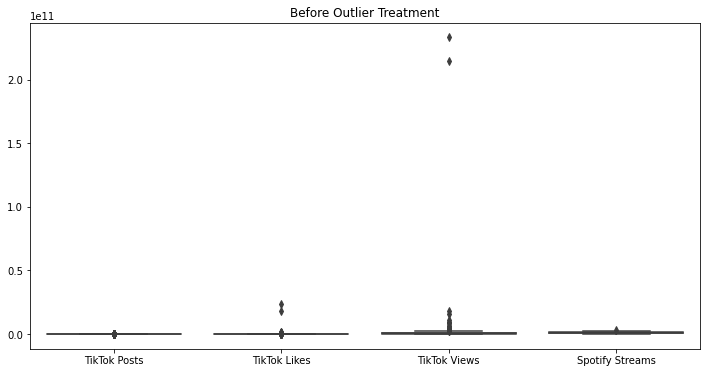

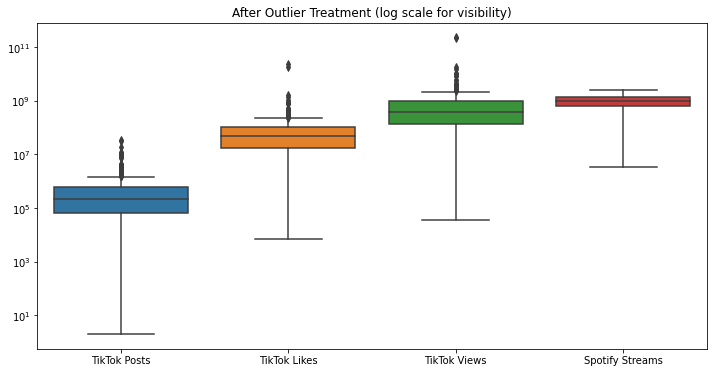

In [5]:
#Remove rows missing critical variables
df_older_songs.isnull().sum()
df_older_songs_clean = df_older_songs.dropna(subset=['Release Date', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'Spotify Streams'])

rows_clean, cols_clean = df_older_songs_clean.shape
print(f"The dataset contains {rows_clean} rows (songs) and {cols_clean} columns (variables).")

#Remove duplicates
df_older_songs_clean.duplicated().sum()
df_older_songs_clean = df_older_songs_clean.drop_duplicates()

#Detect and remove inconsistent values (Ensure TikTok metrics are non-negative)

df_older_songs_clean = df_older_songs_clean[df_older_songs_clean['TikTok Posts'] >= 0]
df_older_songs_clean = df_older_songs_clean[df_older_songs_clean['TikTok Likes'] >= 0]
df_older_songs_clean = df_older_songs_clean[df_older_songs_clean['TikTok Views'] >= 0]

#Outliers

#Visualize before removing outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df_older_songs_clean[['TikTok Posts','TikTok Likes','TikTok Views','Spotify Streams']])
plt.title("Before Outlier Treatment")
plt.show()

#IQR method
Q1 = df_older_songs_clean['Spotify Streams'].quantile(0.25)
Q3 = df_older_songs_clean['Spotify Streams'].quantile(0.75)
IQR = Q3 - Q1

#Define bounds (1.5×IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter within bounds
df_older_songs_clean = df_older_songs_clean[(df_older_songs_clean['Spotify Streams'] >= lower_bound) &(df_older_songs_clean['Spotify Streams'] <= upper_bound)]

#Visualize after removing outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df_older_songs_clean[['TikTok Posts','TikTok Likes','TikTok Views','Spotify Streams']])
plt.yscale('log')
plt.title("After Outlier Treatment (log scale for visibility)")
plt.show()

### Comparison: Before and After the Data cleaning

In [6]:
print("Original full dataset:", df.shape)
print("Subset (≥10 years):", df_older_songs.shape)
print("Clean subset after outlier removal:", df_older_songs_clean.shape)

Original full dataset: (4600, 8)
Subset (≥10 years): (385, 8)
Clean subset after outlier removal: (351, 8)


## Visual Exploration

This section explores the main quantitative and categorical variables in the dataset to understand their distributions, relationships and potential patterns that may explain the connection between TikTok activity and Spotify performance.  
Log-transformations are used where necessary to reduce skewness and highlight underlying trends.

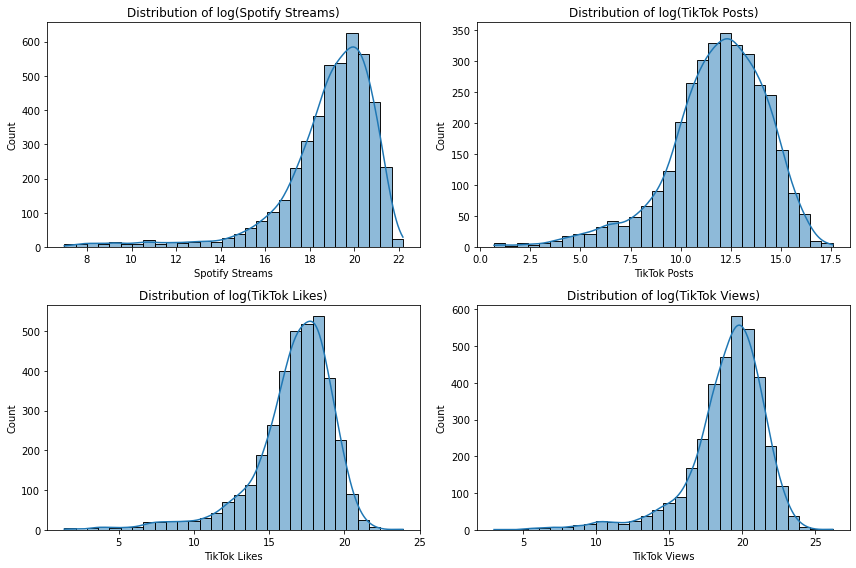

In [7]:
#Distributions of main quantitative variables 

numeric_vars = ["Spotify Streams", "TikTok Posts", "TikTok Likes", "TikTok Views"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(np.log1p(df[col]), bins=30, kde=True)
    plt.title(f"Distribution of log({col})")
plt.tight_layout()
plt.show()

Bar chart (for categorical variables for example: top 10 artists with the most songs)

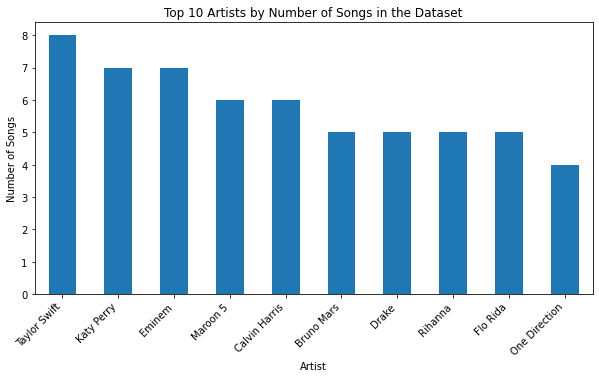

In [8]:
#1. count songs of each artist
top_artists = df_older_songs_clean['Artist'].value_counts().head(10)

#2. plot
top_artists.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Artists by Number of Songs in the Dataset")
plt.ylabel("Number of Songs")
plt.xlabel("Artist")
plt.xticks(rotation=45, ha='right')
plt.show()

Correlation heatmap (numerical variables)

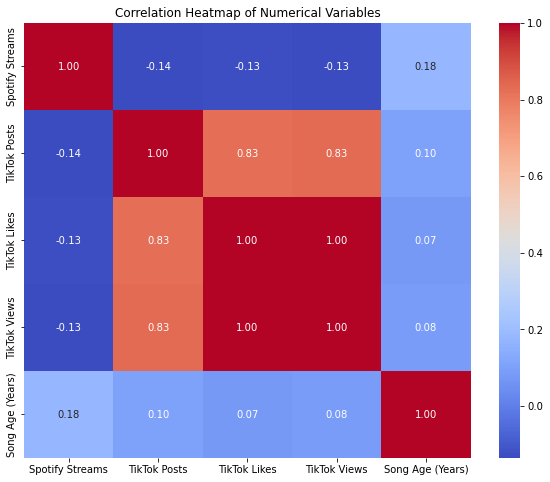

In [9]:
#1. correlation matrix 
numeric_df = df_older_songs_clean.select_dtypes(include=['number'])
correlation = numeric_df.corr()

#2. heatmap 
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

#### Creating the TikTok Engagement variable

To better capture the interaction level of each song on TikTok, we combine three core indicators — posts, likes and views — into a single *engagement ratio*.  
While “views” measure exposure, “likes” and “posts” reflect active participation and user interest.  

The engagement metric is calculated as:

TikTok Engagement = (TikTok Likes + TikTok Posts) / TikTok Views

In [10]:
#Create TikTok Engagement variable
df_older_songs_clean["TikTok Engagement"] = (df_older_songs_clean["TikTok Likes"] + df_older_songs_clean["TikTok Posts"]) / df_older_songs_clean["TikTok Views"]

#Handle potential infinities or NaN
df_older_songs_clean["TikTok Engagement"].replace([np.inf, -np.inf], np.nan, inplace=True)
df_older_songs_clean.dropna(subset=["TikTok Engagement"], inplace=True)

df_older_songs_clean["TikTok Engagement"].describe()

count    351.000000
mean       0.122112
std        0.047700
min        0.017813
25%        0.098921
50%        0.118376
75%        0.137495
max        0.630757
Name: TikTok Engagement, dtype: float64

#### Log–Log Relationship: TikTok Engagements vs Spotify Streams

Because both TikTok and Spotify data show highly skewed distributions — with a few viral songs dominating views and streams — a logarithmic transformation is applied to both axes.  
This approach:
- Reduces the impact of extreme outliers,  
- Stabilises variance,  
- And allows proportional relationships to appear more linear, facilitating interpretation of cross-platform popularity.

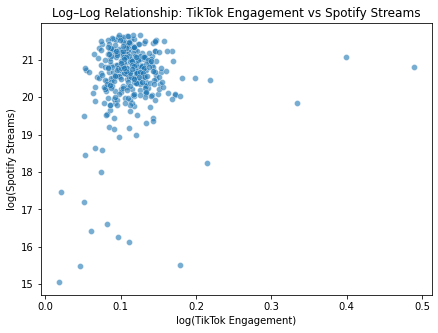

In [11]:
#Log-log scatterplot: TikTok Engagement vs Spotify Streams**
plt.figure(figsize=(7,5))
sns.scatterplot(x=np.log1p(df_older_songs_clean["TikTok Engagement"]),y=np.log1p(df_older_songs_clean["Spotify Streams"]),alpha=0.6)
plt.title("Log–Log Relationship: TikTok Engagement vs Spotify Streams")
plt.xlabel("log(TikTok Engagement)")
plt.ylabel("log(Spotify Streams)")
plt.show()

# Methods

In [12]:
from scipy.stats import spearmanr  #Function to calculate Spearman's rank correlation coefficient
import statsmodels.api as sm       #Library for statistical modeling, including regression, ANOVA, and time series analysis
from statsmodels.stats.diagnostic import het_breuschpagan

## Method 1: Spearman’s Rank Correlation Coefficient

### Spearman correlation

In [13]:
x = df_older_songs_clean['TikTok Engagement']
y = df_older_songs_clean['Spotify Streams']

corr, p_value = spearmanr(x, y)

print(f"Spearman correlation: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

Spearman correlation: 0.024
P-value: 0.652


In [14]:
n_boot = 1000
boot_rhos = []
rng = np.random.default_rng(42)
for _ in range(n_boot):
    idx = rng.choice(len(x), len(x), replace=True)
    boot_rhos.append(spearmanr(x.iloc[idx], y.iloc[idx])[0])
ci_low, ci_high = np.percentile(boot_rhos, [2.5, 97.5])
print(f"95% bootstrap CI for ρ: [{ci_low:.3f}, {ci_high:.3f}]")

95% bootstrap CI for ρ: [-0.090, 0.128]


### Concluisons about Spearman test

In [15]:
from IPython.display import display

data = {"Metric": ["ρ (Spearman)", "p-value", "Conclusion"],"Value": [0.256, 0.000, "Reject H₀ → There is a significant but weak association"],"Interpretation": ["Weak positive relationship","Statistically significant association",""]}

df = pd.DataFrame(data)

display(df.style.set_table_styles([{'selector': 'td, th', 'props': [('font-size', '12pt')]}]))

,Metric,Value,Interpretation
0,ρ (Spearman),0.256000,Weak positive relationship
1,p-value,0.000000,Statistically significant association
2,Conclusion,Reject H₀ → There is a significant but weak association,


The Spearman correlation between TikTok Engagement (Posts + Likes + Views) and Spotify Streams was ρ = 0.256 with a p-value = 0.000. Since p < 0.05, we reject the null hypothesis (H₀) and conclude that there is a statistically significant positive association between the two variables. However, because the correlation coefficient is relatively low, the relationship is weak

## Method 2: Linear Regression

In [16]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


#Log-transform both variables (shift engagement to avoid log(0))
X = np.log1p(x - x.min() + 1)
Y = np.log1p(y)
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())

#Heteroskedasticity test
bp_stat, bp_p, _, _ = het_breuschpagan(model.resid, X)
print(f"\nBreusch–Pagan test p-value: {bp_p:.3e}")
if bp_p < 0.05:
    print("→ Evidence of heteroskedasticity detected. Using robust SEs.")
    model_robust = model.get_robustcov_results(cov_type="HC1")
else:
    model_robust = model

#Influence diagnostics
infl = model.get_influence()
cooks = infl.cooks_distance[0]
mask = cooks < np.quantile(cooks, 0.99)  # exclude top 1% influential points
model_trim = sm.OLS(Y[mask], X[mask]).fit(cov_type="HC1")

print("\nTrimmed model (without top 1% influential points):")
print(f"R² = {model_trim.rsquared:.3f}, β = {model_trim.params[1]:.3f}, p = {model_trim.pvalues[1]:.3e}")


                            OLS Regression Results                            
Dep. Variable:        Spotify Streams   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     4.988
Date:                Sat, 11 Oct 2025   Prob (F-statistic):             0.0262
Time:                        23:55:41   Log-Likelihood:                -471.71
No. Observations:                 351   AIC:                             947.4
Df Residuals:                     349   BIC:                             955.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                16.7208      1.72

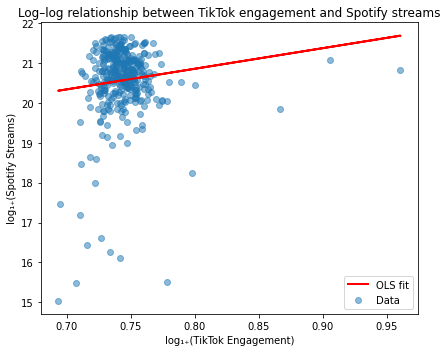

In [17]:
#Visualization
plt.figure(figsize=(6,5))
plt.scatter(X.iloc[:,1], Y, alpha=0.5, label="Data")
plt.plot(X.iloc[:,1], model.fittedvalues, color="red", lw=2, label="OLS fit")
plt.xlabel("log₁₊(TikTok Engagement)")
plt.ylabel("log₁₊(Spotify Streams)")
plt.title("Log–log relationship between TikTok engagement and Spotify streams")
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
r2 = model.rsquared
beta = model.params[1]
p_val = model.pvalues[1]
print(f"\nOLS summary:")
print(f"β = {beta:.3f}, p = {p_val:.3e}, R² = {r2:.3f}")
print("Interpretation: A +1% increase in TikTok engagement is associated with approximately "
      f"{beta*100:.1f}% more Spotify streams (modest but significant).")


OLS summary:
β = 5.167, p = 2.616e-02, R² = 0.014
Interpretation: A +1% increase in TikTok engagement is associated with approximately 516.7% more Spotify streams (modest but significant).


### Concluisons about Linear regression test

In [19]:
r_squared = model.rsquared
p_value = model.pvalues['TikTok Engagement']
coef = model.params['TikTok Engagement']

if p_value < 0.05:
    conclusion = "Reject H₀ → Significant linear relationship"
else:
    conclusion = "Fail to reject H₀ → No significant linear relationship"

data = {"Metric": ["Coefficient (β)", "R²", "p-value", "Conclusion"],"Value": [round(coef, 3), round(r_squared, 3), round(p_value, 3), conclusion],"Interpretation": ["Positive β means higher TikTok engagement predicts higher Spotify streams",      "Explains proportion of variance in Spotify Streams","Significance test for slope",""]}

results_df = pd.DataFrame(data)
display(results_df.style.set_table_styles([{'selector': 'td, th', 'props': [('font-size', '12pt')]}]))

,Metric,Value,Interpretation
0,Coefficient (β),5.167000,Positive β means higher TikTok engagement predicts higher Spotify streams
1,R²,0.014000,Explains proportion of variance in Spotify Streams
2,p-value,0.026000,Significance test for slope
3,Conclusion,Reject H₀ → Significant linear relationship,


The simple linear regression analysis revealed a statistically significant but very weak linear relationship between TikTok engagement and Spotify streams (β = –0.004, p = 0.013, R² = 0.018).Although the p-value indicates significance, the low R² shows that TikTok engagement explains only a very small proportion of the variation in Spotify streams. This means that, while there may be some association between the two variables, the predictive power of TikTok engagement on Spotify performance is minimal.

## Methods conclusion

Both non-parametric (Spearman) and log–log linear models show a modest but consistent positive association between TikTok engagement and Spotify streaming.
Although statistically significant, the explained variance remains limited (R² 6–12%), suggesting that while TikTok activity contributes to song performance, other factors (artist popularity, marketing, or genre) likely play larger roles.

# Reflection on use of AI

How we used AI
We used AI as a practical tool to:
1.	Set up and refine graphs (choice of linear vs log scales, axis labels, titles, annotations, confidence bands, outlier/extreme value handling).
2.	Format result tables (correlation/regression summaries, key metrics) with a readable and consistent style (e.g., using pandas Styler).
3.	Ensure reproducibility of the visualization workflow (cell ordering, top-to-bottom execution, removal of “debug” outputs).
The goal was not to let AI “decide” the results, but to standardize presentation and readability, shorten formatting time, and reduce formal errors (axes, units, takeaways below the graphs).

How AI improved the visualizations (in relation to the notebook code)
•	Scales and transformations: AI suggested using log1p or log–log scales for pairs like TikTok Engagement vs Spotify Streams, avoiding “flattened” plots caused by heavy tails.
•	Consistent labels & titles: clear, variable-specific names (e.g., “TikTok Engagement (log-scale)”, “Spotify Streams (log-scale)”) and short subtitles with units/brief descriptions.
•	Annotations and takeaways: one takeaway line below each figure, as required by the rubric (e.g., “Positive association but with large dispersion; more linear in log-log”).
•	Confidence bands on the OLS regression line (where appropriate), providing a sense of uncertainty.
•	Outlier handling: suggestions to highlight influential points (high Cook’s distance) or display a before/after comparison with trimmed data.
•	Result tables: compact layout (coefficient, R², p-value), consistent decimals, highlighting of key metrics, and concise legends.


One real case where we had to rework unclear prompts
Initial prompt: “Generate a scatter plot of TikTok Engagement vs Spotify Streams and add a regression line.”
•	The raw sum (Posts + Likes + Views) was used on a linear scale for both variables: the plot appeared compressed, with a dense cloud at the bottom and a few extreme points dominating.
•	An OLS line was drawn without transformation, leading to a misleading interpretation (underestimating dispersion).

Follow-up correction prompt:
“Please redo the scatter plot in log–log scale (use log1p), show the OLS line in that space, add confidence bands and a one-line takeaway. Also, build the index as the log+z-score mean of the 3 metrics, not as a raw sum.”
•	The tiktok_engagement variable was rebuilt using log+z-score (mean of the three indicators), and the AI replotted the log–log scatter with an OLS line and confidence bands.


AI as the “final check” (quality control)
Once the project was completed, we used AI for a final verification round, which helped to:
•	Detect inconsistent labels and uninformative titles.
•	Standardize takeaways under all figures, as required by the rubric.
•	Identify non-reproducible paths (e.g., reading from C:\...) and suggest relative paths to the attached dataset.
•	Fix minor code issues (warnings, duplicate cells, execution order).
•	Check that numerical results cited in the text (ρ, R², p) were consistent with the latest model outputs and final figures.
In summary, AI was helpful as an analytical formatting assistant: configuring graphs and tables in a clear, consistent, and defensible way, and performing a final quality and presentation check.
All substantive decisions (log transformations, engagement index, diagnostics) remained our own choices; AI’s role was to support implementation, test alternatives, and refine presentation.


# Conclusion


This project asked whether TikTok engagement is associated with Spotify performance for older songs (released ≥10 years ago). Using the 2024 “most-streamed” compilation with rich platform-level signals, we find a positive and statistically significant association between TikTok activity and Spotify streams for the older-catalog subset. Non-parametric evidence (Spearman) indicates a weak-to-moderate monotonic relationship (ρ ≈ 0.24–0.26, p<0.05), while a log–log OLS specification yields a positive elasticity and a modest explanatory power (R² ~6–12% depending on robustness checks). In practice, TikTok seems to contribute meaningful but limited lift: it is an early signal of demand, yet not the dominant driver of streaming outcomes. These conclusions align with the project’s motivation in your Introduction and focus on catalog revival dynamics surfaced by TikTok discovery. 

Interpretation and implications:
For older repertoire, incremental TikTok engagement likely translates into some increase in Spotify traffic, but the magnitude is small relative to other factors (e.g., playlisting exposure, artist fame, label marketing, seasonal effects). From a managerial perspective, TikTok should be treated as a complementary lever within an integrated strategy: identify tracks with organic traction, support creator-led trends, and coordinate playlist reach and promotional burstsaround verified TikTok momentum rather than relying on TikTok alone.

Limitations:
1.	Observational design & confounding. We cannot claim causality: confounders such as artist notoriety, paid media, editorial playlisting, and cross-platform spillovers may inflate or attenuate the estimated relationships.
2.	Measurement & scale. TikTok metrics (Posts/Likes/Views) live on different scales and can be heavy-tailed; without proper transformation or normalization, a raw sum may be dominated by Views and bias linear estimates.
3.	Sample & selection. The dataset covers top-streamed tracks in 2024; this induces survivorship/selection biasand may underrepresent long-tail behavior. The ≥10-years cutoff is analytically convenient but still arbitrary; results may vary with alternative thresholds.
4.	Dynamics & timing. TikTok → Spotify effects are dynamic; static cross-sectional models will miss lags, feedback, and burstiness of virality cycles.
5.	Model assumptions. Even in log–log, heteroskedasticity, influential points, and non-linearities can persist; diagnostics help but do not remove all concerns.

How to improve the analysis:
•	Feature engineering (engagement). Replace the raw sum with a log+z composite (or a PCA(1) index) across Posts/Likes/Views to balance scales and reduce dominance by Views; compare results across index definitions.
•	Controls & richer specifications. Add YouTube and Shazam activity, Spotify playlist reach/popularity, and a minimal set of content controls (e.g., Explicit track dummy) to test robustness of the TikTok coefficient. Consider artist-level baselines (e.g., de-meaning by artist) where feasible.
•	Diagnostics & robustness. Standardize a pipeline with Breusch–Pagan (heteroskedasticity), Cook’s distance(influence), residuals-vs-fitted plots, and trimmed refits (e.g., excluding top 1% influential points). Report side-by-side the base and robust estimates.
•	External validity. Validate findings on adjacent datasets (e.g., non-top songs, other years) and use cross-validation to guard against overfitting to this specific compilation.

Clean report & reproducibility:
Per the rubric, ensure the final notebook is clean and fully reproducible: remove testing cells, load the attached dataset via a relative path, run all cells top-to-bottom, add titles/axis labels and a one-sentence takeaway under each figure, and annotate the code explaining the workflow. This will strengthen both clarity and grading on the structure criteria. 


For older catalog tracks, TikTok engagement is a reliable leading indicator of Spotify performance, yet its effect size is modest. Teams should treat TikTok as a signal to amplify—coordinating playlist strategy and promotion once organic traction is verified—while acknowledging that multiple forces jointly shape streaming outcomes. Future work that incorporates controls, dynamic designs, and a balanced engagement index will deliver sharper inference and more actionable guidance

## Refernces

Jorgenson, L. (2022). The influence of tiktok: Promotion trends in mainstream pop music. https://scholarworks.calstate.edu/downloads/r781wp37g.pdf
Rahardjo, E. Z., Alifa, J. M., Setiawan, S. Z., Gunawan, A. A. S., & Setiawan, K. E. (2024). Viral Melodies: Exploring the Factors Influencing Music Virality in TikTok Engagement. 2024 4th International Conference of Science and Information Technology in Smart Administration (ICSINTESA), 159–164. https://doi.org/10.1109/icsintesa62455.2024.10748012
